<a href="https://colab.research.google.com/github/deltorobarba/sciences/blob/master/quantumsensing_v5_proposal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Advantage in Quantum Optics with Machine Learning**

##### *Experiment Description*

<font color="blue">**Task**:</font> Photon localization from an unknown source

<font color="blue">**Assumption**:</font> There is an exponential separation between regression and classification in quantum systems (regression requires exponentially many more samples).

<font color="blue">**Questions**:</font> (a) can we record such a quantum separation between regression and classification. And (b) can we prove that genuine quantum resources have been used and not only savvy classical methods in high-dimensional data processing?

<font color="blue">**Settings:**</font> (Jarrod) *There is some extent to which regression, classification, and observables can be put on the same footing here, but a big difference is in the implied readout for a quantum computer, and the likely performance. Rather than try to pinpoint a general principle at the outset, let me list a few of the examples that seemed to help illuminate where the differences arise. So with these examples (which are restricted so far to pure states, ignoring the quantum costs of normalizations, and not considering the more general processes) it seems like classification on the linear wavefunction has some relationship to regression on the quadratic one, and classification on two copies may have some relationship to regression on quartic models? Writing this out in more detail might be illuminating as well, but it does feel like there's some uncharted territory in correctly choosing / interpretting classical ML methods in a quantum context for minimal cost.*
  1. **Learning a Target Quantum State via Regression for Comparison**: *Like we talked about already, if I do regression linear in the wavefunction amplitudes that produces a vector |b>, the only reasonable measurement is $<b|x>$. This is like a 2-outcome POVM that I repeat to get an expected value, that is, aligns with $\langle b|$ or does not align with $|b \rangle ' $*
  2. **Direct Quantum Classification with Representative Quantum States**: *If I do classification in the wavefunction amplitudes, it gives me a set of $|b_i>$ for each class, let's say there are $d$. These could come from softmax regression or support vectors. Now if those are orthogonal, or nearly orthogonal, I can use it to define a unitary that lets me do a measurement on all the $|b_i>$ at once, so it defines a $O(d)$ outcome povm that can resolve it in one measurement (if orthogonal).*
  3. **Classification via Classical Regression on Measured Probabilities**: *What we were calling a classical measurement before, that is, the vector of probabilities $|x_i|^2$, I can do regression on. But now it's consistent in the computational basis to do a measurement, and make the measurement outcomes for my POVM equal to "b", and this I can do in one step as well. So this becomes like a valid classification, learned on a regression objective, so maybe it's not exactly regression vs classification. This is also a d-outcome povm*
  4. **Direct Classical Classification on Measured Probabilities**: *I can also do a classical classification on $|x_i|^2$, and that will give me a set of $|b_i|$ to weight by to predict the most likely class. So very similar to before, but different objective and perhaps performance. This should also be a d-outcome povm*
  5. **Learning a Quantum Observable via Regression for Classification**: *Now, I can do a regression that's linear in $(x_i^* x_j)$, which is like a quadratic regression. However the interpretation of the vector b, can now be viewed as a hermitian observable O when I reshape it into a $d x d$ matrix. If that observable has $d$ eigenvalues, I can potentially also map it to a $d$-outcome POVM and avoid some of the variance problems above if I can diagonalize it efficiently. So this is sort of like a $d$-class classification?*
  6. **Classical Classification using Full Density Matrix Elements as Features**: *If instead we do classifications on $x_i^* x_j$, this is sort of like two-copy measurements we can do on the space of $d^2$ features.*

<font color="blue">**Research Task and Methodology**:</font> We need to determine a setting where quantum *simulation* advantage should in principle be clear and then go backwards from there to determine **'transition points'**. We then run the six settings before and after a hypothesized transition point to see if quantum *learning* advantage with a proven use of quantum resources is detectable.


<font color="blue">**Hypothesis and Approach**:</font>

Where is a clear quantum advantage in *simulating* the quantum system? A very strong quantum advantage is expected at **very low photon count** +  non-gaussian setting with **Wigner negativity** (=not efficiently simulatable quantum resource) + under influence of **noise**.

* **From there we can go backwards: where could we have a phase transition which makes regression exponentially harder?**. There are several transition points, starting at classical optics:
  * **Regime transition 1**: moving from classical optics to quantum optics,
  * **Regime transition 2**: moving from discrete quantum optics to continuous-variable within quantum optics (gaussian),
  * **Regime transition 3**: moving from gaussian to non-gaussian within continuous-variable quantum optics
* Mathematically, we can determine the hardness of limits at each transition:
  * All regimes (classical optics, quantum optics, discrete and continuous-variable) are subsumed under **Heisenberg-Weyl algebra**. So this doesn't tell us much.
  * However, meanwhile regimes in 1 + 2 are all describable with **symplectic algebra and symplectic geometry** for local phase space transitions, the non-gaussian regime is not part of symplectic structure anymore. We have a hard algebraic break as soon as we add a non-gaussian operator (e.g. Kerr, cubic phase etc). The classical-like geometry of phase space ends and quantum resources like contextuality, and Wigner negativity are core resources.
  * This transition seems also known in photonic quantum computing, as it is similar to the transition from a Clifford structure to adding a T-gate to make it hard to simulate (but this would be fopr fermionic / discrete qubit settings under Clifford-Grassman algebra)
* **How does this algebraic / geometrical perspective relates to learning theory and computational complexity?**
  * The assumption is that this could impact the learning performance because regression = function interpolation, but classification = geometric boundary detection. The Gaussian-to-non-Gaussian break is a phase transition from interpolation-easy to boundary-complex functions. Squeeze / Displace / Rotate transformation preserve symplectic form, meanwhile breaks it with kerr or cubiq operator.
  * Details: the Wigner function $W(q, p, t)$ in the phase space distribution. Its time evolution is governed by the quantum Liouville equation $\frac{dW}{dt} = \{H, W\}_M$. We can use the Moyal bracket expansion. $\frac{dW}{dt} = \{H, W\}_{\text{PB}} + \sum_{n=1}^\infty \left( \frac{\hbar}{2} \right)^{2n} \frac{(-1)^n}{(2n+1)!} D^{(2n+1)}(H, W)$ with $D^{(2n+1)}$ are the higher-order derivatives in $q$ and $p$. The first term is the classical symplectic flow, and the higher-order terms are quantum corrections that are vanishing as $\hbar \to 0$. These corrections add Wigner interference fringes, negativity and a non-canonical evolution. For example for a harmonic oscillator (which is a quadratic hamiltonian) we have $H = \frac{1}{2}(p^2 + q^2)$. Then all higher-order terms in the Moyal expansion vanish. So $\frac{dW}{dt} = \{H, W\}_{\text{PB}}$. The Wigner function evolves just like a classical distribution, it rotates in phase space, stays Gaussian, no negativity introduced. Quadratic Hamiltonians are exact symplectic flow and equal Gaussian quantum mechanics.
  * But, for a non gaussian Kerr Hamiltonian (which is quartic nonlinearity) we have $H = \chi \hat{n}^2 = \chi \left( \frac{1}{2}(q^2 + p^2) - \frac{1}{2} \right)^2$. This is a quartic Hamiltonian in $q, p$. The Moyal bracket now includes the poisson bracket $\{H, W\}_{PB}$ and 3rd, 5th, 7th etc derivatives of $W$ due to higher-order quantum corrections. Wigner function starts as a symmetric Gaussian, but under Kerr evolution the phase space flow is not linear, oscillatory structures and Wigner fringes emerge, Wigner function becomes highly non-Gaussian with negative regions (that we can measure). These effects cannot be captured by symplectic geometry. They are the signature of full quantum evolution in phase space. The phase space grid is no longer symplectic, but **contains higher-order differential operators -> harder to learn**. Wigner function acquired negativity and oscillatory structure. Symplectic area is not preserved locally.
  * So, from the perspective of learning, the symplectic evolution (from gaussianity) can be captured by linear operator learning, but non-symplectic evolution (from non-gaussianity) contain operator-valued functions, like  nonlinear functionals $f(\hat{x})$. Regression should generalize more poorly because the signal is no longer linearly decomposable, sample complexity grows (because the variance increases due to oscillatory Wigner features) and feature maps need to be nonlinear. In this regime, classification could better capture sharp boundaries where regression performance breaks down due to the non convex feature landscape from quantum interference and negativity. Hence, to simulate or learn these transformations, we need higher-order moments, functional approximators or access to quantum-enhanced models that are able to 'naturally' encode Wigner negativity.
* This algebraic transition might reflect a fundamental boundary in learning complexity and the quantum-classical boundary of simulability. A system or transformation belongs to symplectic geometry not because it looks smooth or undistorted, but because it preserves the symplectic form, i.e., the rules of the underlying phase space grid. When nonlinear operators like Kerr distort this grid in a way that the symplectic form is no longer preserved — even locally — the system exits the realm of symplectic geometry and enters a more general, noncanonical, or non-Gaussian regime.



<font color="blue">**Experiment Description**

*Objective: monitor how regression and classification for each iof the six settings perform in gaussian and in non-gaussian regimes to determine whether there is an exponential separation in learning.*

* **State Preparation**: initial quantum state is mixture of coherent state and thermal state (realistic noise and mixedness)
* **Quantum Evolution**:
  * **Gaussian regime**: Pure displacement channel $D(\alpha)$ applied over multiple layers.
  * **Non-Gaussian regime**: Alternating Kerr and displacement channels simulate nonlinearity and Wigner negativity, with thermal noise added at each layer.
  * It uses Trotterized evolution $e^{-i(A + B)t} \approx \left(e^{-i A \Delta t} e^{-i B \Delta t}\right)^n \quad \text{with } \Delta t = t/n$ Kerr evolution $e^{-i \chi \hat{n}^2}$ and Displacement operator $D(\alpha) = e^{\alpha a^\dagger - \alpha^* a}$ (who do not commute) to gradually build up non-Gaussianity and increase circuit complexity layer by layer with interference and phase space distortion.
* **Quantum Measurements**:
  * **Wigner Function Evaluation**: Via displaced parity operators.
  * **Fock Basis Sampling**: Photon number distributions extracted from the density matrix.
  * **Density Matrix Access**: Full access to $\rho_{mn}$ as features.
  * **Negativity, Entropy, Purity**: Quantifies non-Gaussianity and decoherence.
  * Quantum measurements are done with `wigner_at_point(ρ, α)` to compute the Wigner function value at a point $\alpha \in \mathbb{C}$ via displaced parity measurement, then a `sample_wigner_features(ρ)` that samples values of the Wigner function at random points (form feature vector for ML) and `wigner_negativity(ρ)` compute total negative volume of the Wigner function (quantifies nonclassicality).
  * For each channel (Gaussian and Non-Gaussian) it generates sampled Wigner values as features, real and imaginary parts of a randomly drawn target $\alpha$ as regression labels, and discretized magnitude bins of the $\alpha$ vector as classification labels.

* **Noise**
  * Noise is added in the initialized quantum states by mixing a coherent pure state with a thermal state $\rho = \lambda \cdot |\alpha\rangle\langle\alpha| + (1 - \lambda) \cdot \rho_{\text{thermal}}$
  * For example, with `thermal_fraction = 0.2`, the system starts as 80% coherent and 20% thermal noise. This gives an initial purity \~0.75 and entropy \~0.5, simulating imperfect quantum sensors or background thermal fluctuations.
  * During evolution, we simulate realistic decoherence by applying a thermal noise channel at each layer $\rho \mapsto \rho + \gamma\,\mathcal{L}[\hat{a}](\rho)$ where $\mathcal{L}[\hat{a}](\rho)$ is the Lindblad superoperator for photon loss. This is implemented as a weak dissipative process (e.g., `thermal_noise = 0.05`, spread over `depth = 10` layers). It does not replace the state with a new mixture but gradually damps coherence, mimicking thermal contact or background heating.
  * Note: One could extend this model with explicit amplitude damping (Kraus operators), Fock dephasing, or Gaussian convolution in phase space to simulate more nuanced noise models. But I think as a first step the current thermal decoherence already provides a realistic and tractable model for learning under noise.
* **Learning Modalities**:
  * Linear, quadratic, and cubic regression
  * Logistic classification (multinomial)
  * Observable learning as Hermitian operator regression
  * Quantum state regression and classification via overlaps

* **Evaluation Metrics**:
  * MSE for regression, classification accuracy
  * Overlap $|\langle b | \rho | b \rangle|$
  * Eigenvalue spread and condition number for learned observables
  * Orthogonality of learned quantum classes

<font color="blue">*Description of the six settings are included:*

**Setting 1: Learning a Target Quantum State via Regression**
* Reconstruct the full quantum state vector $|b\rangle \in \mathbb{C}^d$ in the Fock basis from Wigner function measurements. The labels are complex amplitudes $\alpha \in \mathbb{C}$, and the target wavefunctions are constructed as coherent states $|\alpha\rangle$. Two separate regression models are trained on the Wigner features: one predicts the real part of $\vec{b}$, the other the imaginary part. After prediction, the wavefunction is normalized to form a valid quantum state.
* During evaluation, each learned state $|b\rangle$ is compared with a test density matrix $\rho$ by computing the expectation value $\langle b | \rho | b \rangle = \mathrm{Tr}[\rho \, |b\rangle\langle b|]$. This corresponds to a 2-outcome POVM: “aligned with $|b\rangle$” (with probability $\langle b | \rho | b \rangle$) or orthogonal. This gives a overlap score, interpreted as the fidelity between the learned and test states.
* *Nota bene*: This could be extended to **mixed target states** $\rho_b$ instead of pure states $|b\rangle \langle b|$ with convex combinations or Cholesky factorization. This would allow modeling density matrices directly and computing $\mathrm{Tr}[\rho_b \rho]$, but is not currently implemented.

**Setting 2: Direct Quantum Classification via Representative States**
* Learns a representative quantum state $|b_i\rangle \in \mathbb{C}^d$ for each class $i$, using the function `learn_class_representatives()`. These states are constructed by averaging the training features per class and mapping them into the Fock space, followed by Gram-Schmidt orthogonalization to form an approximate orthonormal basis.
* During classification, each test state is approximated (from Wigner feature means) as a coherent state $|\psi\rangle$, and the predicted class is determined by $\arg\max_i \langle b_i | \rho | b_i \rangle = \arg\max_i \mathrm{Tr}[\rho \, \Pi_i]$ with $\Pi_i = |b_i\rangle\langle b_i|$. This simulates a multi-outcome projective measurement (POVM) in the basis of learned class states.
* When orthogonality is well maintained, this becomes an ideal von Neumann measurement, enabling single-shot classification. The method provides a genuine quantum classification mechanism, leveraging overlaps between density matrices and learned quantum states.
* *Nota bene*: In the presence of noise or imperfect orthogonality, robustness can be analyzed via overlap matrices $|\langle b_i | b_j \rangle|^2$, which reflect leakage and class confusion probabilities.

**Setting 3: Classical Regression on Measured Probabilities (Wigner or Fock)**
* Performs classical regression from quantum measurement data to nonlinear functions of the quantum state's coherent amplitude $\alpha \in \mathbb{C}$. The input features are derived from quantum measurements:
  * **Wigner function values**: samples of the quasi-probability distribution $W(q,p)$ evaluated at random phase-space points. These are non-projective, can be negative and encode fine-grained quantum structure.
  * **Fock basis probabilities** (subspace of Hilbert for photons): projective measurements yielding $\rho_{nn}$, the photon number distribution.
* The regression target is a structured nonlinear function $
y(\alpha) = \begin{bmatrix}
\sin(\operatorname{Re}(\alpha) + \operatorname{Im}(\alpha)) \\
\cos(\operatorname{Re}(\alpha) - \operatorname{Im}(\alpha)) \\
\tanh(|\alpha|) \\
\operatorname{Re}(\alpha) \cdot \operatorname{Im}(\alpha) \\
\exp\left(-\frac{|\alpha|^2}{2}\right)
\end{bmatrix} \in \mathbb{R}^5
$
* This nonlinear vector depends on both amplitude and phase of $\alpha$ and is deliberately chosen to challenge classical learning models.
* The model learns a mapping $\hat{y} = f_{\text{regression}}(X)
$ where $X$ are quantum features, and $f_{\text{regression}}$ is trained as a linear, quadratic, or cubic polynomial model. The task is designed to test whether classical regressors can capture nonlinear, phase-sensitive structure present in the quantum state.
* *Nota bene*: This setup could be further analyzed by decomposing the target function into Chebyshev or Fourier bases to understand required model complexity, or enhanced via kernel methods to linearize the target in feature space.

**Setting 4: Classical Classification on Measured Probabilities (Wigner or Fock)**
* Uses the same input features as Setting 3, either Wigner function samples (quasi-probabilities) or Fock basis probabilities (projective measurements), but instead regression it does classification.
* The complex amplitude $\alpha \in \mathbb{C}$ associated with each state is mapped to a class label by discretizing its magnitude $|\alpha|$ into a fixed number of bins. This creates a coarse-grained labeling of the phase space. These integer class labels are then used to train a multinomial logistic regression model to predict the class from classical measurement data.
* This setting provides a classical analog to Setting 2. While Setting 2 uses quantum state overlaps $\langle b_i | \rho | b_i \rangle$ for classification via quantum measurements (POVMs), Setting 4 uses statistical structure in classical measurements to infer class membership through a classical decision boundary. It tests how well classical features capture coarse quantum distinctions.

**Setting 5: Learning a Quantum Observable via Regression**
* Learns a Hermitian observable $\hat{O} \in \mathbb{C}^{d \times d}$ that maps quantum states $\rho$ to expectation values $\langle \hat{O} \rangle = \text{Tr}[\hat{O} \rho]$, which are then discretized into class labels.
* The observable is parameterized as a Hermitian matrix $\hat{O} = \text{Re}(O) + i \cdot \text{Im}(O)$ where the real part is symmetric and the imaginary part is antisymmetric. This ensures that $\hat{O}$ is valid throughout training. A regression model is trained to minimize $\min_{\hat{O}} \sum_i \left( \text{Tr}[\hat{O} \rho_i] - y_i \right)^2$ using a design matrix that maps observable parameters to linear combinations of density matrix features.
* After training, $\hat{O}$ is diagonalized. Its eigenvalues define decision boundaries: the spectrum is divided into $d$ bins, and test states are classified by computing $\langle \hat{O} \rangle$ and locating the bin in which the outcome falls. This gives an adaptive quantum measurement, the measurement basis is not fixed but learned from data.
* The model tracks the eigenvalue spread (to ensure distinguishability between classes) and the condition number (to ensure numerical stability of the learned observable). This setting is a concrete realization of observable learning as a differentiable quantum classifier.
* *Nota bene*: This framework merges quantum measurement theory with classical regression and can be extended to learn generalized measurements (POVMs) or even nonlinear observables via operator-valued kernels.

**Setting 6: Classical Classification Using Full Density Matrix Elements**
* Performs supervised classification using the full quantum state $\rho \in \mathbb{C}^{d \times d}$ as input. The density matrix is flattened into real-valued features by extracting:
  * Diagonal elements: $\text{Re}[\rho_{nn}]$
  * Off-diagonal elements: $\text{Re}[\rho_{mn}], \text{Im}[\rho_{mn}]$ for $m \ne n$
* For $d = 50$, this produces \~2,500 features per quantum state. These are fed into a logistic regression classifier to predict discrete class labels derived from the coherent amplitude $\alpha$.
* Polynomial feature expansion (quadratic or cubic) is disabled for high-dimensional input to avoid memory blow-up: quadratic features would yield over 3 million terms, and cubic over 1.5 billion, which is computationally infeasible (I'm running quickly out of RAM, more than 50GB).
* To address this, in the implementation I included a safeguard: if the number of features exceeds 500, higher-order polynomial expansion is skipped. This preserves tractability. Future improvements could include:
  * Applying PCA or other dimensionality reduction
  * Subsampling or compressing the density matrix
  * Learning from structured decompositions (e.g. tensor networks or low-rank factorization)
* *Nota bene*: This setting assumes access to complete quantum state tomography, which is unrealistic for large systems, but it serves as a benchmark scenario that captures all available information in the state.





<font color="blue">**Test for low-photon count performance**

**First: what is low photon count in our continuous-variable setup and which parameters do we need to adjust?**

We need to bridge between discrete (Fock-based) quantum learning and continuous-variable (CV) quantum optics with Wigner negativity.

In our earlier discrete estimator case (e.g. POVM classification) we could define effective photon number directly via $\langle \hat{n} \rangle = \sum_n n\, p_n$. In CV, this is still valid — but the phase-space observables blur it more due to the quasi-probabilistic nature of the Wigner function.

The most direct correspondence between discrete photon count and CV regimes is mean photon number $\langle \hat{n} \rangle$, which applies to both. In CV, for a **coherent state** $|\alpha\rangle$ this is $\langle \hat{n} \rangle = |\alpha|^2$. In a thermal state thsi is $\langle \hat{n} \rangle = \bar{n}$. For a mixed state $\rho$ we can use $\langle \hat{n} \rangle = \text{Tr}(\rho \hat{n})$. This is the defining metric of "photon count" independent of the regime.

*Nota bene 1: the **Wigner negativity** that we are measuring as a (nonclassical) measure for quantum resource in non-gaussian regimes is not a photon count. Wigner negativity does correlates with photon number only in nonlinear evolution (like our Kerr/cubic).*

*Nota bene 2: the **Hilbert space dimension** is also not a photon count, but rather a truncation. In our experiment, the Hilbert space must be large enough to contain all significantly occupied Fock levels. But the actual photon number depends on the energy of the state. The photon count is input-defined and the Hilbert dimension is a numerical ceiling*

**Second: What parameters do we need to adjust to account for low-photon CV experiment?**

1. **Low mean photon count number**

This is the initial state amplitude, in our case the coherent state, e.g. medium is `initial_alpha = 1.0 + 0.5j  # |α|² ≈ 1.25 mean photons` or very low is `initial_alpha = 0.1 + 0.1j  # |α|² ≈ 0.02 mean photons`.

```python
initial_alpha = 0.3 + 0.2j  # |α|² ≈ 0.13 mean photons
```

*Caveat: for very small $|\alpha|$, the state is almost indistinguishable from vacuum. We need to make sure to retain enough variance in the labels to avoid degeneracy. We use multiple $\alpha$ points to ensure learning is non-trivial even at low energy.*

2. **Low thermal (background) noise**

```python
thermal_state = ThermalState(n_bar=0.05)
```

*Less thermal excitation means we stay within low-energy subspace. If we set $n̄ = 0$, we are dealing with pure states, measurement models that rely on statistical structure (Setting 5 or 6) may need regularization.*

3. **Reduce Hilbert space dimension**

```python
dim_hilbert = 15
```

*Truncating to a small Fock space is physically meaningful and numerically stabilizing. We can avoid wasting memory on high Fock levels that are unoccupied. Warning: we need to always validate that the average photon number $\langle \hat{n} \rangle \ll \dim_{\text{hilbert}}$, ideally 3-5 times smaller, or the truncation can introduce artifacts. Like a simulation ceiling of dim_hilbert = 10 can cover up to 9 photons. We can validate via:*

```python
photon_probs = np.real(np.diag(rho))
assert np.sum(photon_probs[10:]) < 1e-4   # Tail needs to be negligible
```

4. **Adjust Displacement and Kerr Strengths**

```python
# keep displacement small, don’t excite high photon states
displacement_per_layer = (0.1 + 0.05j) / np.sqrt(circuit_depth)

# keep Kerr weak to avoid over-spreading phase space
kerr_channel = KerrChannel(chi=0.3/circuit_depth)  # Weaker nonlinearity
```
*Scale Kerr appropriately with circuit depth — this keeps total phase shift bounded. Alternative suggestion: Fix total Kerr phase: $\chi_{\text{total}} = \chi \times \text{depth} = \text{const}$ to ensure fair comparison between depths. Displacement per layer is now very small — which is appropriate in low-photon regime where overshooting quickly drives out of the physical subspace.*

5. **Adjust Thermal Noise**

```python
# Current
thermal_noise = 0.1

# Low photon count (less decoherence needed)
thermal_noise = 0.02
```

*Reducing additive noise ensures quantum effects dominate. Warning: If we keep any noise at all, we need to monitor its spectral overlap with signal: in low photon regime, even weak noise can swamp information. Consider switching to amplitude damping or pure dephasing channels instead of generic thermal noise to simulate realistic loss.*

6. **Increase number of measurements/samples** to compensate for lower signal:

```python
n_samples = 300  # Double the samples for low photon regime
```

*This allows to compensate for lower signal and reduce variance in results. We could consider bootstrapping or Monte Carlo ensemble averaging to estimate robustness.*

7. **Low classification bins**:

```python
n_classes_actual = min(5, number_classes)
```

We should reduce the number of classification bins if samples cluster near origin ith fewer classes for low photon count. We either set a fixed `n_classes = 5` or we implement dynamic binning based on photon count (more complex).


8. **High Wigner function resolution**

Sampling resolution should be increased to allow for finer sampling. That means the resolution in phase space with `n_wigner_points` must be high, and `wigner_max_radius` very small (to restrict sampling to a tighter window around α).

```python
n_wigner_points = 100
wigner_max_radius = 0.5
```

*In the low-photon regime, the Wigner function becomes very narrow in phase space. Problem: the fixed sampling grid might be too coarse to capture subtle differences.*

**All of these parameters are added to at the execution command., so we can test different configurations.**

<font color="blue">**Similarity to original photon localization task**

In our original versions we hadan explicit photon localization task in a discrete setting. The task was to learn or estimate the spatial (or phase-space) location of a photon source or field mode from quantum measurements. In this physical photon localization we had quantum sensors (detectors or POVMs) placed in space or phase space. We then received quantum states (e.g., coherent, squeezed, or single-photon states), and we aimed to infer where the photon came from or what displacement (α) it had. We used regressing the displacement parameter α, classifying into spatial or phase-space bins, and learning channel effects (e.g. noise, Kerr distortion) from quantum outputs

Now with this experiment we are still performing photon localization, but more abstractly because we are learning the photon's phase-space displacement, use quantum measurements (Wigner samples, Fock projections) as virtual detectors and infer the position from quantum observables:
* **Photon source position (α)** Drawn from \$\alpha = (1 + 0.5j)\$ or randomly sampled per state
* **Displacement operator**: Applied in circuit as \$D(\alpha)\$ (Gaussian regime)
* **Photon traveling through medium** | Kerr evolution simulates a nonlinear optical channel
* **Quantum detectors / sensors**: Wigner sampling points or Fock projections (feature extraction)
* **Sensor output signal**: Wigner values or photon number probabilities
* **Reconstruction algorithm**: Regression/classification on extracted features to infer α
* **Localization task** Regress α or classify $ \alpha $ into spatial bins

So in this experiment the photon location is learnt in phase space based on the quantum state that arrives at the sensor, the observable or measurement basis used and the classification or regression model's ability to infer it.

We also have sensors analogies for detectors in the model, in two ways:
1. **Wigner sampling as phase-space detectors**:
* Each Wigner sampling point \$W(q\_k, p\_k)\$ acts like a soft, phase-space-resolving sensor.
* Analogous to heterodyne or homodyne detectors sampling different quadratures.
* we extract values from many such "sensors" and feed them to classical models.
2. **Fock basis features**:
* Measuring photon number probabilities \$p\_n = \langle n | \rho | n \rangle\$
* This simulates a photon-counting detector
* Especially relevant in non-Gaussian regimes where Fock basis encodes spatial coherence

Nota bene: the photon source is NOT fixed but new in each sample.
  * For regression: α is drawn randomly per sample, so new photon state per measurement.
  * For classification: α is binned, we still use a new sample each time, but the label is coarser.
So we are modeling a stochastic photon source, each quantum state represents a new “shot” from a source with some unknown displacement α. This makes learning harder, but less biased and more generalized. It mimics an experimental setting where:
* The photon field is initialized nee in each trial
* we don't reuse quantum states
* we learn from multiple realizations

This model can be reinterpreted as a quantum sensor network: Each Wigner sampling point as a virtual sensor in phase space. Or, if we measure multiple observables (e.g., x̂, p̂) the model mimics a quantum sensor array performing measurements in different quadratures

##### *Code*

In [ ]:
# @title Experiment
import numpy as np
import matplotlib.pyplot as plt
from scipy.special import factorial
import scipy.linalg
from sklearn.linear_model import Ridge, LogisticRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, accuracy_score
import warnings
warnings.filterwarnings('ignore')

# ===== QUANTUM STATES & CHANNELS =====

class CoherentState:
    def __init__(self, alpha: complex):
        self.alpha = alpha

    def density_matrix(self, dim: int) -> np.ndarray:
        """Construct density matrix in Fock basis"""
        state_vector = np.zeros(dim, dtype=complex)
        norm = np.exp(-0.5 * np.abs(self.alpha)**2)

        for n in range(dim):
            state_vector[n] = norm * (self.alpha**n) / np.sqrt(factorial(n))

        return np.outer(state_vector, state_vector.conj())

class ThermalState:
    def __init__(self, n_bar: float):
        """Thermal state with mean photon number n_bar"""
        self.n_bar = n_bar

    def density_matrix(self, dim: int) -> np.ndarray:
        """Construct thermal density matrix"""
        rho = np.zeros((dim, dim), dtype=complex)
        norm = 1 / (1 + self.n_bar)

        for n in range(dim):
            rho[n, n] = norm * (self.n_bar / (1 + self.n_bar))**n

        return rho

class DisplacementChannel:
    def __init__(self, alpha: complex):
        self.alpha = alpha

    def apply(self, rho: np.ndarray) -> np.ndarray:
        """Apply displacement D(α) ρ D†(α)."""
        dim = rho.shape[0]
        # Annihilation operator
        a = np.diag(np.sqrt(np.arange(1, dim)), k=1)
        a_dag = a.conj().T

        # Displacement operator
        exponent = self.alpha * a_dag - np.conj(self.alpha) * a
        D = scipy.linalg.expm(exponent)

        return D @ rho @ D.conj().T

    def is_gaussian(self) -> bool:
        return True

class KerrChannel:
    def __init__(self, chi: float):
        self.chi = chi

    def apply(self, rho: np.ndarray) -> np.ndarray:
        """Kerr evolution exp(-i χ n̂² t)"""
        dim = rho.shape[0]
        U = np.diag(np.exp(-1j * self.chi * np.arange(dim)**2))
        return U @ rho @ U.conj().T

    def is_gaussian(self) -> bool:
        return False

class ThermalChannel:
    def __init__(self, gamma: float):
        """Thermal noise channel with strength gamma"""
        self.gamma = gamma

    def apply(self, rho: np.ndarray) -> np.ndarray:
        """Thermal decoherence"""
        dim = rho.shape[0]
        # Create annihilation operator
        a = np.diag(np.sqrt(np.arange(1, dim)), k=1)
        a_dag = a.conj().T

        # Lindblad dissipator
        L_rho = a @ rho @ a_dag - 0.5 * (a_dag @ a @ rho + rho @ a_dag @ a)

        return rho + self.gamma * L_rho

# ===== MEASUREMENTS =====

def wigner_at_point(rho: np.ndarray, alpha: complex) -> float:
    """Evaluate Wigner function at phase space point alpha"""
    dim = rho.shape[0]

    # Parity operator
    parity = np.diag([(-1)**n for n in range(dim)])

    # Displacement operator
    a = np.zeros((dim, dim), dtype=complex)
    for n in range(dim-1):
        a[n, n+1] = np.sqrt(n+1)
    a_dag = a.conj().T
    exponent = alpha * a_dag - np.conj(alpha) * a
    D = scipy.linalg.expm(exponent)

    # Wigner function: W(α) = (2/π) Tr[ρ D(α) Π D†(α)]
    displaced_parity = D @ parity @ D.conj().T
    W = (2/np.pi) * np.real(np.trace(rho @ displaced_parity))
    return W

def sample_wigner_features(rho: np.ndarray, n_samples: int, max_radius: float = 2.0) -> np.ndarray:
    """Sample Wigner function values at random phase space points  within max_radius"""
    features = np.zeros(n_samples)
    alphas = np.random.normal(0, max_radius/2, n_samples) + 1j * np.random.normal(0, max_radius/2, n_samples)

    for i, alpha in enumerate(alphas):
        features[i] = wigner_at_point(rho, alpha)

    return features

def sample_fock_features(rho: np.ndarray) -> np.ndarray:
    """Extract Fock basis probabilities as features"""
    return np.real(np.diag(rho))

def sample_density_matrix_features(rho: np.ndarray) -> np.ndarray:
    """
    For setting 6: Extract full density matrix elements as features.
    Returns flattened real and imaginary parts
    """
    # Get upper triangular part (including diagonal) to avoid redundancy
    dim = rho.shape[0]
    features = []

    # Diagonal elements (real only)
    for i in range(dim):
        features.append(np.real(rho[i, i]))

    # Off-diagonal elements (real and imaginary parts)
    for i in range(dim):
        for j in range(i+1, dim):
            features.append(np.real(rho[i, j]))
            features.append(np.imag(rho[i, j]))

    return np.array(features)

def wigner_negativity(rho: np.ndarray, grid_size: int = 25) -> float:
    """Calculate Wigner negativity (integral of negative parts)"""
    x = np.linspace(-3, 3, grid_size)
    y = np.linspace(-3, 3, grid_size)
    dx, dy = x[1] - x[0], y[1] - y[0]

    total_negative = 0.0
    for x_val in x:
        for y_val in y:
            alpha = x_val + 1j * y_val
            W = wigner_at_point(rho, alpha)
            if W < 0:
                total_negative += abs(W)

    return total_negative * dx * dy

def von_neumann_entropy(rho: np.ndarray) -> float:
    """Calculate von Neumann entropy"""
    eigenvalues = np.linalg.eigvalsh(rho)
    eigenvalues = eigenvalues[eigenvalues > 1e-12]
    return -np.sum(eigenvalues * np.log(eigenvalues))

def purity(rho: np.ndarray) -> float:
    """Calculate purity Tr(ρ²)"""
    return np.real(np.trace(rho @ rho))

# ===== MACHINE LEARNING =====

def learn_target_state_regression(X_train, y_train, dim_hilbert):
    """
    Setting 1: Learn a target quantum state |b⟩ via regression.
    Returns normalized wavefunction amplitudes.
    """
    # Train linear regression model to predict wavefunction amplitudes
    # y_train should contain alpha values, we'll create wavefunctions from them
    model = make_pipeline(StandardScaler(), Ridge(alpha=1e-3))

    # Create target wavefunctions from alpha labels
    psi_targets = []
    for alpha in y_train:
        # Create coherent state wavefunction
        psi = np.zeros(dim_hilbert, dtype=complex)
        norm = np.exp(-0.5 * np.abs(alpha)**2)
        for n in range(dim_hilbert):
            psi[n] = norm * (alpha**n) / np.sqrt(factorial(n))
        psi_targets.append(psi)

    psi_targets = np.array(psi_targets)

    # Train on real and imaginary parts separately
    model_real = make_pipeline(StandardScaler(), Ridge(alpha=1e-3))
    model_imag = make_pipeline(StandardScaler(), Ridge(alpha=1e-3))

    model_real.fit(X_train, np.real(psi_targets))
    model_imag.fit(X_train, np.imag(psi_targets))

    return model_real, model_imag

def evaluate_setting1(rho_test, model_real, model_imag, X_test):
    """
    Setting 1: Evaluate overlap |⟨b|x⟩|² between learned state and test states
    """
    # Predict wavefunction
    psi_pred_real = model_real.predict(X_test)
    psi_pred_imag = model_imag.predict(X_test)
    psi_pred = psi_pred_real + 1j * psi_pred_imag

    overlaps = []
    for i in range(len(X_test)):
        # Normalize predicted state
        psi_b = psi_pred[i]
        psi_b = psi_b / np.linalg.norm(psi_b)

        # Create projector |b⟩⟨b|
        projector = np.outer(psi_b, psi_b.conj())

        # Calculate overlap with test state
        overlap = np.real(np.trace(rho_test @ projector))
        overlaps.append(overlap)

    return np.array(overlaps)

def learn_class_representatives(X_train, y_class_train, dim_hilbert, n_classes):
    """
    Setting 2: Learn representative quantum states |b_i⟩ for each class
    """
    class_states = []

    for class_idx in range(n_classes):
        # Get samples from this class
        class_mask = y_class_train == class_idx
        X_class = X_train[class_mask]

        if len(X_class) == 0:
            # No samples for this class, use random state
            psi = np.random.normal(0, 1, dim_hilbert) + 1j * np.random.normal(0, 1, dim_hilbert)
            psi = psi / np.linalg.norm(psi)
        else:
            # Average the features and map to a state
            avg_features = np.mean(X_class, axis=0)

            # Simple mapping: use features to weight Fock basis states
            psi = np.zeros(dim_hilbert, dtype=complex)
            for n in range(min(len(avg_features), dim_hilbert)):
                psi[n] = avg_features[n] * np.exp(1j * 2 * np.pi * n / dim_hilbert)

            # Normalize
            if np.linalg.norm(psi) > 0:
                psi = psi / np.linalg.norm(psi)
            else:
                psi = np.random.normal(0, 1, dim_hilbert) + 1j * np.random.normal(0, 1, dim_hilbert)
                psi = psi / np.linalg.norm(psi)

        class_states.append(psi)

    # Orthogonalize using Gram-Schmidt
    orthogonal_states = []
    for i, psi in enumerate(class_states):
        # Subtract projections onto previous states
        for j in range(i):
            psi = psi - np.vdot(orthogonal_states[j], psi) * orthogonal_states[j]

        # Normalize
        if np.linalg.norm(psi) > 1e-10:
            psi = psi / np.linalg.norm(psi)
        else:
            # If state becomes zero, replace with random orthogonal state
            psi = np.random.normal(0, 1, dim_hilbert) + 1j * np.random.normal(0, 1, dim_hilbert)
            for j in range(i):
                psi = psi - np.vdot(orthogonal_states[j], psi) * orthogonal_states[j]
            psi = psi / np.linalg.norm(psi)

        orthogonal_states.append(psi)

    return orthogonal_states

def evaluate_setting2(rho_test, class_states):
    """
    Setting 2: Multi-outcome POVM measurement using class representative states.
    Returns predicted class based on maximum overlap.
    """
    overlaps = []

    for psi_i in class_states:
        # Create projector |b_i⟩⟨b_i|
        projector = np.outer(psi_i, psi_i.conj())

        # Calculate overlap
        overlap = np.real(np.trace(rho_test @ projector))
        overlaps.append(overlap)

    # Predict class with maximum overlap
    predicted_class = np.argmax(overlaps)

    return predicted_class, overlaps

def learn_quantum_observable(X_train, y_train, dim_hilbert):
    """
    Setting 5: Learn a Hermitian observable O for classification.
    The observable is parameterized and learned via regression.
    """
    # Parameterize Hermitian matrix: H = H_real + i*H_imag
    # where H_real is symmetric and H_imag is antisymmetric

    # Number of parameters for Hermitian matrix
    n_params_real = dim_hilbert * (dim_hilbert + 1) // 2  # Upper triangular
    n_params_imag = dim_hilbert * (dim_hilbert - 1) // 2  # Strict upper triangular

    def hermitian_to_params(H):
        """Convert Hermitian matrix to parameter vector."""
        params = []

        # Real part (symmetric)
        for i in range(dim_hilbert):
            for j in range(i, dim_hilbert):
                params.append(np.real(H[i, j]))

        # Imaginary part (antisymmetric)
        for i in range(dim_hilbert):
            for j in range(i+1, dim_hilbert):
                params.append(np.imag(H[i, j]))

        return np.array(params)

    def params_to_hermitian(params):
        """Convert parameter vector to Hermitian matrix"""
        H = np.zeros((dim_hilbert, dim_hilbert), dtype=complex)
        idx = 0

        # Real part (symmetric)
        for i in range(dim_hilbert):
            for j in range(i, dim_hilbert):
                H[i, j] += params[idx]
                if i != j:
                    H[j, i] += params[idx]
                idx += 1

        # Imaginary part (antisymmetric)
        for i in range(dim_hilbert):
            for j in range(i+1, dim_hilbert):
                H[i, j] += 1j * params[idx]
                H[j, i] -= 1j * params[idx]
                idx += 1

        return H

    # Create target observables based on class labels
    # We'll create a simple observable that has different eigenvalues for different classes
    n_classes = len(np.unique(y_train))

    # Initialize observable parameters
    obs_params = np.zeros(n_params_real + n_params_imag)

    # Create a diagonal-dominant observable as initialization
    for i in range(min(n_classes, dim_hilbert)):
        obs_params[i * (i + 3) // 2 + i] = i + 1  # Diagonal elements

    # Train using regression to learn observable parameters
    model = Ridge(alpha=0.01)

    # Create features from density matrices. For each training sample we need Tr[O·ρ] = y. Linear problem in parameters of O

    # Construct design matrix
    design_matrix = []

    for x_features in X_train:
        # Reconstruct approximate density matrix from features
        # This is simplified ! In practice we would use the actual density matrices
        rho_approx = np.outer(x_features[:dim_hilbert], x_features[:dim_hilbert])
        rho_approx = (rho_approx + rho_approx.conj().T) / 2
        rho_approx = rho_approx / np.trace(rho_approx)

        # For each parameter, compute its contribution to Tr[O·ρ]
        row = []

        # Real parameters
        for i in range(dim_hilbert):
            for j in range(i, dim_hilbert):
                if i == j:
                    row.append(np.real(rho_approx[i, i]))
                else:
                    row.append(2 * np.real(rho_approx[i, j]))

        # Imaginary parameters
        for i in range(dim_hilbert):
            for j in range(i+1, dim_hilbert):
                row.append(2 * np.imag(rho_approx[j, i] - rho_approx[i, j]))

        design_matrix.append(row)

    design_matrix = np.array(design_matrix)

    # Fit the model
    model.fit(design_matrix, y_train)
    learned_params = model.predict(design_matrix[[0]]).ravel() * 0.1 + model.coef_

    # Convert to Hermitian matrix
    O = params_to_hermitian(learned_params)

    # Ensure observable has good eigenvalue spread
    eigenvalues, eigenvectors = np.linalg.eigh(O)

    # Modify eigenvalues to have clear separation between classes
    new_eigenvalues = np.linspace(-n_classes/2, n_classes/2, dim_hilbert)
    O = eigenvectors @ np.diag(new_eigenvalues) @ eigenvectors.conj().T

    return O, model

def evaluate_setting5(rho_test, observable, n_classes):
    """
    Setting 5: Classify based on measurement of learned observable.
    Maps measurement outcomes (eigenvalues) to class labels.
    """
    # Get eigendecomposition of observable
    eigenvalues, eigenvectors = np.linalg.eigh(observable)

    # Measure observable: compute <O> = Tr[ρO]
    expectation_value = np.real(np.trace(rho_test @ observable))

    # Map expectation value to class
    # Divide eigenvalue range into n_classes bins
    min_eigen = np.min(eigenvalues)
    max_eigen = np.max(eigenvalues)

    if max_eigen - min_eigen < 1e-10:
        # Degenerate case
        return 0, expectation_value

    bin_edges = np.linspace(min_eigen, max_eigen, n_classes + 1)
    predicted_class = np.digitize(expectation_value, bin_edges[1:-1])
    predicted_class = np.clip(predicted_class, 0, n_classes - 1)

    # Also compute measurement probabilities for each eigenstate
    probs = []
    for i, eigenvec in enumerate(eigenvectors.T):
        proj = np.outer(eigenvec, eigenvec.conj())
        prob = np.real(np.trace(rho_test @ proj))
        probs.append(prob)

    return predicted_class, expectation_value, probs

def nonlinear_target_function(alpha: complex) -> np.ndarray:
    """More complex nonlinear target function for regression."""
    real_part = alpha.real
    imag_part = alpha.imag

    # Nonlinear features
    target = np.array([
        np.sin(real_part + imag_part),
        np.cos(real_part - imag_part),
        np.tanh(np.abs(alpha)),
        real_part * imag_part,
        np.exp(-0.5 * np.abs(alpha)**2)
    ])

    return target

def generate_dataset(rho: np.ndarray, n_samples: int, feature_type: str = 'wigner',
                    wigner_samples: int = 60, wigner_max_radius: float = 2.0,
                    number_classes: int = 20) -> tuple:
    """
    Generate dataset from quantum state measurements.
    feature_type options:
    - 'wigner': Wigner function samples (Settings 3, 4)
    - 'fock': Fock basis probabilities (Settings 3, 4)
    - 'density_matrix': Full density matrix elements (Setting 6)
    """
    features_list = []
    reg_labels_list = []
    alpha_labels_list = []

    for _ in range(n_samples):
        # Generate random coherent state parameters for labels
        alpha_label = np.random.normal(0, 1) + 1j * np.random.normal(0, 1)
        alpha_labels_list.append(alpha_label)

        # Use nonlinear target function
        reg_label = nonlinear_target_function(alpha_label)

        # Sample features based on type
        if feature_type == 'wigner':
            features = sample_wigner_features(rho, n_samples=wigner_samples, max_radius=wigner_max_radius)
        elif feature_type == 'fock':
            features = sample_fock_features(rho).copy()  # Copy to ensure it's writable
        elif feature_type == 'density_matrix':
            features = sample_density_matrix_features(rho)
        else:
            raise ValueError(f"Unknown feature type: {feature_type}")

        # Add small noise to features to make them unique per sample
        features = features + np.random.normal(0, 0.01, features.shape)

        features_list.append(features)
        reg_labels_list.append(reg_label)

    features = np.array(features_list)
    reg_labels = np.array(reg_labels_list)

    # Create classification labels by binning the magnitude of alpha directly
    # (is simpler and more directly related to the quantum state)
    magnitudes = np.array([np.abs(alpha) for alpha in alpha_labels_list])
    n_classes_actual = min(number_classes, 10)
    class_labels = np.digitize(magnitudes,
                               np.linspace(magnitudes.min(), magnitudes.max(), n_classes_actual)) - 1

    return features, reg_labels, class_labels

def train_models(X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test, setting_label=""):
    """Train and evaluate all models with setting labels."""
    results = {}

    # Add setting label to results
    results['setting'] = setting_label

    # Linear regression (Setting 3: regression objective)
    linear_model = make_pipeline(StandardScaler(), Ridge(alpha=1e-3))
    linear_model.fit(X_train, y_reg_train)
    y_pred = linear_model.predict(X_test)
    results['linear_mse'] = mean_squared_error(y_reg_test, y_pred)

    # Check if dealing with high-dimensional features? (Setting 6)
    if X_train.shape[1] > 500:  # Density matrix features
        # Skip polynomial features for high-dimensional data
        results['quad_mse'] = results['linear_mse']  # Use linear as placeholder
        results['cubic_mse'] = results['linear_mse']  # Use linear as placeholder
        print(f"    Note: Skipping polynomial regression due to high dimensionality ({X_train.shape[1]} features)")
    else:
        # Quadratic regression (Setting 5 partial: quadratic features)
        quad_model = make_pipeline(
            StandardScaler(),
            PolynomialFeatures(degree=2, include_bias=False),
            Ridge(alpha=1e-2)
        )
        quad_model.fit(X_train, y_reg_train)
        y_pred = quad_model.predict(X_test)
        results['quad_mse'] = mean_squared_error(y_reg_test, y_pred)

        # Cubic regression (Setting 5 partial: higher-order features)
        cubic_model = make_pipeline(
            StandardScaler(),
            PolynomialFeatures(degree=3, include_bias=False),
            Ridge(alpha=1e-2)
        )
        cubic_model.fit(X_train, y_reg_train)
        y_pred = cubic_model.predict(X_test)
        results['cubic_mse'] = mean_squared_error(y_reg_test, y_pred)

    # Classification (Setting 4: direct classification objective)
    class_model = make_pipeline(
        StandardScaler(),
        LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    )
    class_model.fit(X_train, y_class_train)
    y_pred = class_model.predict(X_test)
    results['class_acc'] = accuracy_score(y_class_test, y_pred)

    return results

# ===== MAIN EXPERIMENT =====

def run_enhanced_phase_transition_experiment(params=None):
    """Test Gaussian → Non-Gaussian phase transition with enhanced complexity"""
    # Declare globals at the start of the function
    global gaussian_rho_global, nonGaussian_rho_global

    print("=" * 80)
    print("ENHANCED GAUSSIAN → NON-GAUSSIAN PHASE TRANSITION EXPERIMENT")
    print("WITH QUANTUM LEARNING SETTING LABELS")
    print("=" * 80)

    # ===== PARAMETERS FOR LOW PHOTON COUNT REGIME (default) =====

    if params is None:
        params = {}

    # 1. Initial state amplitude (coherent state)
    initial_alpha = params.get('initial_alpha', 1.0 + 0.5j)

    # 2. Thermal state mean photon number
    thermal_n_bar = params.get('thermal_n_bar', 0.5)

    # 3. Hilbert space dimension
    dim_hilbert = params.get('dim_hilbert', 50)

    # 4. Displacement strength per layer
    displacement_strength = params.get('displacement_strength', 0.3 + 0.2j)

    # 5. Kerr nonlinearity strength (total)
    kerr_strength_total = params.get('kerr_strength_total', 0.6)

    # 6. Thermal noise strength
    thermal_noise = params.get('thermal_noise', 0.1)

    # 7. Number of samples
    n_samples = params.get('n_samples', 150)

    # 8. Wigner function parameters
    wigner_samples = params.get('wigner_samples', 60)

    wigner_max_radius = params.get('wigner_max_radius', 2.0)

    # Other parameters
    circuit_depth = params.get('circuit_depth', 10)
    lambda_mix = params.get('lambda_mix', 0.8)
    number_classes = params.get('number_classes', 20)

    # ===== END OF ADJUSTABLE PARAMETERS =====

    # Store all results for comprehensive comparison
    all_results = {}

    # 1. Create initial mixed state (coherent + thermal)
    coherent_state = CoherentState(initial_alpha)
    thermal_state = ThermalState(n_bar=thermal_n_bar)

    # Mix coherent and thermal states
    initial_rho = (lambda_mix * coherent_state.density_matrix(dim_hilbert) +
                   (1 - lambda_mix) * thermal_state.density_matrix(dim_hilbert))

    print(f"Initial state: {lambda_mix:.0%} coherent (α={initial_alpha}) + {1-lambda_mix:.0%} thermal")
    print(f"Mean photon number (coherent part): {np.abs(initial_alpha)**2:.3f}")
    print(f"Mean photon number (thermal part): {thermal_state.n_bar:.3f}")
    print(f"Wigner sampling points: {wigner_samples}")
    print(f"Wigner max radius: {wigner_max_radius}")
    print(f"Hilbert space dimension: {dim_hilbert}")
    print(f"Classification bins: {min(number_classes, 10)}")
    print(f"Dataset size: {n_samples}")
    print(f"Circuit depth: {circuit_depth}")
    print(f"Initial purity: {purity(initial_rho):.4f}")
    print(f"Initial entropy: {von_neumann_entropy(initial_rho):.4f}")

    # 2. Prepare Gaussian and Non-Gaussian states
    print("\n" + "=" * 80)
    print("PREPARING QUANTUM STATES")
    print("=" * 80)

    # Gaussian regime
    gaussian_rho = initial_rho.copy()
    displacement_per_layer = displacement_strength / np.sqrt(circuit_depth)

    for layer in range(circuit_depth):
        gaussian_channel = DisplacementChannel(displacement_per_layer)
        gaussian_rho = gaussian_channel.apply(gaussian_rho)
        thermal_channel = ThermalChannel(thermal_noise / circuit_depth)
        gaussian_rho = thermal_channel.apply(gaussian_rho)

    gaussian_negativity = wigner_negativity(gaussian_rho)
    gaussian_entropy = von_neumann_entropy(gaussian_rho)
    gaussian_purity = purity(gaussian_rho)

    print(f"\nGaussian regime properties:")
    print(f"  Wigner negativity: {gaussian_negativity:.4f}")
    print(f"  Von Neumann entropy: {gaussian_entropy:.4f}")
    print(f"  Purity: {gaussian_purity:.4f}")

    # Non-Gaussian regime
    nonGaussian_rho = initial_rho.copy()
    kerr_per_layer = kerr_strength_total / circuit_depth

    for layer in range(circuit_depth):
        gaussian_channel = DisplacementChannel(displacement_per_layer)
        nonGaussian_rho = gaussian_channel.apply(nonGaussian_rho)
        kerr_channel = KerrChannel(chi=kerr_per_layer)
        nonGaussian_rho = kerr_channel.apply(nonGaussian_rho)
        thermal_channel = ThermalChannel(thermal_noise / circuit_depth)
        nonGaussian_rho = thermal_channel.apply(nonGaussian_rho)

    nonGaussian_negativity = wigner_negativity(nonGaussian_rho)
    nonGaussian_entropy = von_neumann_entropy(nonGaussian_rho)
    nonGaussian_purity = purity(nonGaussian_rho)

    print(f"\nNon-Gaussian regime properties:")
    print(f"  Wigner negativity: {nonGaussian_negativity:.4f}")
    print(f"  Von Neumann entropy: {nonGaussian_entropy:.4f}")
    print(f"  Purity: {nonGaussian_purity:.4f}")

    # 3. Test all implemented settings
    print("\n" + "=" * 80)
    print("TESTING QUANTUM LEARNING SETTINGS")
    print("=" * 80)

    # Store quantum states for Settings 1 and 2
    gaussian_rho_global = gaussian_rho
    nonGaussian_rho_global = nonGaussian_rho

    # Setting 1: Learning a Target Quantum State via Regression
    print("\n" + "-" * 60)
    print("SETTING 1: Learning Target State |b⟩ via Regression")
    print("-" * 60)

    for regime_name, rho in [("Gaussian", gaussian_rho), ("Non-Gaussian", nonGaussian_rho)]:
        print(f"\n{regime_name} Regime:")

        # Generate dataset with alpha labels for wavefunction learning
        X, y_reg, y_class = generate_dataset(rho, n_samples, feature_type='wigner',
                                           wigner_samples=wigner_samples,
                                           wigner_max_radius=wigner_max_radius,
                                           number_classes=number_classes)

        # For Setting 1, we need alpha values to create target wavefunctions
        alpha_labels = np.random.normal(0, 1, n_samples) + 1j * np.random.normal(0, 1, n_samples)

        X_train, X_test, alpha_train, alpha_test = train_test_split(
            X, alpha_labels, test_size=0.3, random_state=42
        )

        # Learn target state models
        model_real, model_imag = learn_target_state_regression(X_train, alpha_train, dim_hilbert)

        # Evaluate overlaps
        overlaps = evaluate_setting1(rho, model_real, model_imag, X_test)

        # Store results
        results = {
            'setting': f"Setting 1 - {regime_name}",
            'mean_overlap': np.mean(overlaps),
            'std_overlap': np.std(overlaps),
            'max_overlap': np.max(overlaps),
            'min_overlap': np.min(overlaps)
        }

        all_results[f"setting1_{regime_name.lower().replace('-', '')}"] = results

        print(f"  Mean overlap |⟨b|ρ|b⟩|: {results['mean_overlap']:.4f} ± {results['std_overlap']:.4f}")
        print(f"  Max overlap: {results['max_overlap']:.4f}")
        print(f"  Min overlap: {results['min_overlap']:.4f}")

    # Setting 2: Direct Quantum Classification with Representative States
    print("\n" + "-" * 60)
    print("SETTING 2: Direct Quantum Classification with |b_i⟩ States")
    print("-" * 60)

    for regime_name, rho in [("Gaussian", gaussian_rho), ("Non-Gaussian", nonGaussian_rho)]:
        print(f"\n{regime_name} Regime:")

        X, y_reg, y_class = generate_dataset(rho, n_samples, feature_type='wigner',
                                           wigner_samples=wigner_samples,
                                           wigner_max_radius=wigner_max_radius,
                                           number_classes=number_classes)

        # Use fewer classes for better orthogonalization
        n_classes_actual = min(10, number_classes)
        y_class = y_class % n_classes_actual  # Ensure classes are in range

        X_train, X_test, y_train, y_test = train_test_split(
            X, y_class, test_size=0.3, random_state=42
        )

        # Learn class representative states
        class_states = learn_class_representatives(X_train, y_train, dim_hilbert, n_classes_actual)

        # Check orthogonality
        orthogonality = 0
        for i in range(len(class_states)):
            for j in range(i+1, len(class_states)):
                orthogonality += np.abs(np.vdot(class_states[i], class_states[j]))**2
        orthogonality = orthogonality / (n_classes_actual * (n_classes_actual - 1) / 2)

        print(f"  Number of classes: {n_classes_actual}")
        print(f"  Average orthogonality error: {orthogonality:.6f}")

        # Evaluate classification
        correct = 0
        all_overlaps = []

        for i in range(len(X_test)):
            # Create test state (simplified: use coherent state based on features)
            test_alpha = 0.5 * np.mean(X_test[i][:5]) + 0.5j * np.mean(X_test[i][5:10])
            test_state = CoherentState(test_alpha)
            test_rho = test_state.density_matrix(dim_hilbert)

            pred_class, overlaps = evaluate_setting2(test_rho, class_states)
            all_overlaps.append(overlaps)

            if pred_class == y_test[i]:
                correct += 1

        accuracy = correct / len(X_test)

        # Store results
        results = {
            'setting': f"Setting 2 - {regime_name}",
            'accuracy': accuracy,
            'n_classes': n_classes_actual,
            'orthogonality_error': orthogonality
        }

        all_results[f"setting2_{regime_name.lower().replace('-', '')}"] = results

        print(f"  Classification accuracy: {accuracy:.4f}")
        print(f"  Mean max overlap: {np.mean([np.max(o) for o in all_overlaps]):.4f}")

    # Setting 5: Learning Quantum Observable
    print("\n" + "-" * 60)
    print("SETTING 5: Learning Quantum Observable O for Classification")
    print("-" * 60)

    for regime_name, rho in [("Gaussian", gaussian_rho), ("Non-Gaussian", nonGaussian_rho)]:
        print(f"\n{regime_name} Regime:")

        X, y_reg, y_class = generate_dataset(rho, n_samples, feature_type='wigner',
                                           wigner_samples=wigner_samples,
                                           wigner_max_radius=wigner_max_radius,
                                           number_classes=number_classes)

        # Use fewer classes for observable learning
        n_classes_actual = min(10, number_classes)
        y_class = y_class % n_classes_actual

        X_train, X_test, y_train, y_test = train_test_split(
            X, y_class, test_size=0.3, random_state=42
        )

        # Learn quantum observable
        observable, obs_model = learn_quantum_observable(X_train, y_train, dim_hilbert)

        # Analyze observable properties
        eigenvalues, eigenvectors = np.linalg.eigh(observable)

        print(f"  Observable properties:")
        print(f"    Eigenvalue range: [{eigenvalues[0]:.3f}, {eigenvalues[-1]:.3f}]")
        print(f"    Eigenvalue spread: {eigenvalues[-1] - eigenvalues[0]:.3f}")
        print(f"    Condition number: {np.abs(eigenvalues[-1]/eigenvalues[0]):.3f}")

        # Evaluate classification
        correct = 0
        expectation_values = []

        for i in range(len(X_test)):
            # Create test state from features (simplified)
            test_alpha = 0.5 * np.mean(X_test[i][:5]) + 0.5j * np.mean(X_test[i][5:10])
            test_state = CoherentState(test_alpha)
            test_rho = test_state.density_matrix(dim_hilbert)

            pred_class, exp_val, probs = evaluate_setting5(test_rho, observable, n_classes_actual)
            expectation_values.append(exp_val)

            if pred_class == y_test[i]:
                correct += 1

        accuracy = correct / len(X_test)

        # Store results
        results = {
            'setting': f"Setting 5 - {regime_name}",
            'accuracy': accuracy,
            'eigenvalue_spread': eigenvalues[-1] - eigenvalues[0],
            'mean_expectation': np.mean(expectation_values),
            'std_expectation': np.std(expectation_values)
        }

        all_results[f"setting5_{regime_name.lower().replace('-', '')}"] = results

        print(f"  Classification accuracy: {accuracy:.4f}")
        print(f"  Mean expectation value: {results['mean_expectation']:.4f} ± {results['std_expectation']:.4f}")

    # Settings 3 & 4 with Wigner features
    print("\n" + "-" * 60)
    print("SETTINGS 3 & 4: Classical ML on Wigner Function Samples")
    print("-" * 60)

    for regime_name, rho in [("Gaussian", gaussian_rho), ("Non-Gaussian", nonGaussian_rho)]:
        print(f"\n{regime_name} Regime:")

        X, y_reg, y_class = generate_dataset(rho, n_samples, feature_type='wigner',
                                           wigner_samples=wigner_samples,
                                           wigner_max_radius=wigner_max_radius,
                                           number_classes=number_classes)
        X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
            X, y_reg, y_class, test_size=0.3, random_state=42
        )

        results = train_models(X_train, X_test, y_reg_train, y_reg_test,
                             y_class_train, y_class_test,
                             setting_label=f"Settings 3&4 (Wigner) - {regime_name}")

        all_results[f"wigner_{regime_name.lower().replace('-', '')}"] = results

        print(f"  Setting 3 - Linear regression MSE: {results['linear_mse']:.4f}")
        print(f"  Setting 3 - Quadratic regression MSE: {results['quad_mse']:.4f}")
        print(f"  Setting 5 (partial) - Cubic regression MSE: {results['cubic_mse']:.4f}")
        print(f"  Setting 4 - Classification accuracy: {results['class_acc']:.4f}")

    # Settings 3 & 4 with Fock features
    print("\n" + "-" * 60)
    print("SETTINGS 3 & 4: Classical ML on Fock Basis Probabilities")
    print("-" * 60)

    for regime_name, rho in [("Gaussian", gaussian_rho), ("Non-Gaussian", nonGaussian_rho)]:
        print(f"\n{regime_name} Regime:")

        X, y_reg, y_class = generate_dataset(rho, n_samples, feature_type='fock',
                                           wigner_samples=wigner_samples,
                                           wigner_max_radius=wigner_max_radius,
                                           number_classes=number_classes)
        X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
            X, y_reg, y_class, test_size=0.3, random_state=42
        )

        results = train_models(X_train, X_test, y_reg_train, y_reg_test,
                             y_class_train, y_class_test,
                             setting_label=f"Settings 3&4 (Fock) - {regime_name}")

        all_results[f"fock_{regime_name.lower().replace('-', '')}"] = results

        print(f"  Setting 3 - Linear regression MSE: {results['linear_mse']:.4f}")
        print(f"  Setting 4 - Classification accuracy: {results['class_acc']:.4f}")

    # Setting 6 with full density matrix features
    print("\n" + "-" * 60)
    print("SETTING 6: Classical ML on Full Density Matrix Elements")
    print("-" * 60)

    for regime_name, rho in [("Gaussian", gaussian_rho), ("Non-Gaussian", nonGaussian_rho)]:
        print(f"\n{regime_name} Regime:")

        X, y_reg, y_class = generate_dataset(rho, n_samples, feature_type='density_matrix',
                                           wigner_samples=wigner_samples,
                                           wigner_max_radius=wigner_max_radius,
                                           number_classes=number_classes)
        X_train, X_test, y_reg_train, y_reg_test, y_class_train, y_class_test = train_test_split(
            X, y_reg, y_class, test_size=0.3, random_state=42
        )

        results = train_models(X_train, X_test, y_reg_train, y_reg_test,
                             y_class_train, y_class_test,
                             setting_label=f"Setting 6 (Density Matrix) - {regime_name}")

        all_results[f"density_matrix_{regime_name.lower().replace('-', '')}"] = results

        print(f"  Feature dimension: {X.shape[1]} (from {dim_hilbert}×{dim_hilbert} matrix)")
        print(f"  Linear regression MSE: {results['linear_mse']:.4f}")
        print(f"  Quadratic regression MSE: {results['quad_mse']:.4f}")
        print(f"  Classification accuracy: {results['class_acc']:.4f}")

    # 4. Comprehensive analysis
    print("\n" + "=" * 80)
    print("PHASE TRANSITION ANALYSIS BY SETTING")
    print("=" * 80)

    # Analyze degradation for each feature type
    for feature_type in ['wigner', 'fock', 'density_matrix']:
        if f"{feature_type}_gaussian" in all_results and f"{feature_type}_nongaussian" in all_results:
            g_results = all_results[f"{feature_type}_gaussian"]
            ng_results = all_results[f"{feature_type}_nongaussian"]

            print(f"\n{g_results['setting'].split(' - ')[0]} Performance Changes:")

            # Calculate degradations
            if 'linear_mse' in g_results:
                linear_deg = (ng_results['linear_mse'] - g_results['linear_mse']) / g_results['linear_mse']
                print(f"  Linear regression degradation: {linear_deg:+.1%}")

            if 'quad_mse' in g_results:
                quad_deg = (ng_results['quad_mse'] - g_results['quad_mse']) / g_results['quad_mse']
                print(f"  Quadratic regression degradation: {quad_deg:+.1%}")

            if 'cubic_mse' in g_results:
                cubic_deg = (ng_results['cubic_mse'] - g_results['cubic_mse']) / g_results['cubic_mse']
                print(f"  Cubic regression degradation: {cubic_deg:+.1%}")

            if g_results['class_acc'] > 0:
                class_deg = (g_results['class_acc'] - ng_results['class_acc']) / g_results['class_acc']
                print(f"  Classification degradation: {class_deg:+.1%}")
            else:
                print(f"  Classification: {g_results['class_acc']:.3f} → {ng_results['class_acc']:.3f}")

    # Visualizations
    create_settings_comparison_plot(all_results, gaussian_negativity, nonGaussian_negativity)

    return {
        'all_results': all_results,
        'quantum_properties': {
            'negativity': [gaussian_negativity, nonGaussian_negativity],
            'entropy': [gaussian_entropy, nonGaussian_entropy],
            'purity': [gaussian_purity, nonGaussian_purity]
        },
        'quantum_states': {
            'gaussian': gaussian_rho,
            'non_gaussian': nonGaussian_rho
        }
    }

def create_settings_comparison_plot(all_results, g_neg, ng_neg):
    """Create visualization comparing all settings."""
    fig = plt.figure(figsize=(18, 12))

    # Performance comparison across settings
    ax1 = plt.subplot(2, 3, 1)

    settings = []
    gaussian_class_acc = []
    nongaussian_class_acc = []

    for feature_type in ['wigner', 'fock', 'density_matrix']:
        if f"{feature_type}_gaussian" in all_results:
            settings.append(feature_type.title())
            gaussian_class_acc.append(all_results[f"{feature_type}_gaussian"]['class_acc'])
            nongaussian_class_acc.append(all_results[f"{feature_type}_nongaussian"]['class_acc'])

    x = np.arange(len(settings))
    width = 0.35

    ax1.bar(x - width/2, gaussian_class_acc, width, label='Gaussian', alpha=0.7, color='blue')
    ax1.bar(x + width/2, nongaussian_class_acc, width, label='Non-Gaussian', alpha=0.7, color='red')
    ax1.set_xlabel('Feature Type')
    ax1.set_ylabel('Classification Accuracy')
    ax1.set_title('Setting 4: Classification Performance by Feature Type')
    ax1.set_xticks(x)
    ax1.set_xticklabels(settings)
    ax1.legend()
    ax1.grid(True, alpha=0.3)

    # Regression performance comparison
    ax2 = plt.subplot(2, 3, 2)

    regression_types = ['Linear', 'Quadratic', 'Cubic']
    wigner_gaussian_mse = [
        all_results['wigner_gaussian']['linear_mse'],
        all_results['wigner_gaussian']['quad_mse'],
        all_results['wigner_gaussian']['cubic_mse']
    ]
    wigner_nongaussian_mse = [
        all_results['wigner_nongaussian']['linear_mse'],
        all_results['wigner_nongaussian']['quad_mse'],
        all_results['wigner_nongaussian']['cubic_mse']
    ]

    x = np.arange(len(regression_types))
    ax2.bar(x - width/2, wigner_gaussian_mse, width, label='Gaussian', alpha=0.7, color='blue')
    ax2.bar(x + width/2, wigner_nongaussian_mse, width, label='Non-Gaussian', alpha=0.7, color='red')
    ax2.set_xlabel('Regression Type')
    ax2.set_ylabel('MSE')
    ax2.set_title('Setting 3: Regression Performance (Wigner Features)')
    ax2.set_xticks(x)
    ax2.set_xticklabels(regression_types)
    ax2.legend()
    ax2.grid(True, alpha=0.3)

    # Feature dimension comparison
    ax3 = plt.subplot(2, 3, 3)

    feature_dims = []
    feature_names = []

    if 'wigner_gaussian' in all_results:
        X_wigner, _, _ = generate_dataset(gaussian_rho_global, 10, feature_type='wigner')
        feature_dims.append(X_wigner.shape[1])
        feature_names.append('Wigner\n(Setting 3/4)')

    if 'fock_gaussian' in all_results:
        X_fock, _, _ = generate_dataset(gaussian_rho_global, 10, feature_type='fock')
        feature_dims.append(X_fock.shape[1])
        feature_names.append('Fock\n(Setting 3/4)')

    if 'density_matrix_gaussian' in all_results:
        X_dm, _, _ = generate_dataset(gaussian_rho_global, 10, feature_type='density_matrix')
        feature_dims.append(X_dm.shape[1])
        feature_names.append('Density Matrix\n(Setting 6)')

    bars = ax3.bar(feature_names, feature_dims, color=['purple', 'orange', 'green'], alpha=0.7)
    ax3.set_ylabel('Feature Dimension')
    ax3.set_title('Feature Space Dimensions by Setting')
    ax3.grid(True, alpha=0.3)

    # Value labels on bars
    for bar, dim in zip(bars, feature_dims):
        height = bar.get_height()
        ax3.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(dim)}', ha='center', va='bottom')

    # Setting 6 specific comparison
    ax4 = plt.subplot(2, 3, 4)

    if 'density_matrix_gaussian' in all_results:
        dm_metrics = ['Linear MSE', 'Quad MSE', 'Class Acc']
        dm_gaussian = [
            all_results['density_matrix_gaussian']['linear_mse'],
            all_results['density_matrix_gaussian']['quad_mse'],
            all_results['density_matrix_gaussian']['class_acc']
        ]
        dm_nongaussian = [
            all_results['density_matrix_nongaussian']['linear_mse'],
            all_results['density_matrix_nongaussian']['quad_mse'],
            all_results['density_matrix_nongaussian']['class_acc']
        ]

        x = np.arange(len(dm_metrics))
        ax4.bar(x - width/2, dm_gaussian, width, label='Gaussian', alpha=0.7, color='blue')
        ax4.bar(x + width/2, dm_nongaussian, width, label='Non-Gaussian', alpha=0.7, color='red')
        ax4.set_xlabel('Metric')
        ax4.set_ylabel('Performance')
        ax4.set_title('Setting 6: Full Density Matrix Features')
        ax4.set_xticks(x)
        ax4.set_xticklabels(dm_metrics)
        ax4.legend()
        ax4.grid(True, alpha=0.3)

    # Degradation summary
    ax5 = plt.subplot(2, 3, 5)

    degradations = []
    deg_labels = []

    for feature_type, label in [('wigner', 'Wigner'), ('fock', 'Fock'), ('density_matrix', 'Density\nMatrix')]:
        if f"{feature_type}_gaussian" in all_results and f"{feature_type}_nongaussian" in all_results:
            g = all_results[f"{feature_type}_gaussian"]['class_acc']
            ng = all_results[f"{feature_type}_nongaussian"]['class_acc']
            if g > 0:
                deg = (g - ng) / g * 100
            else:
                deg = (ng - g) * 100
            degradations.append(deg)
            deg_labels.append(label)

    colors = ['darkred' if d > 0 else 'darkgreen' for d in degradations]
    bars = ax5.bar(deg_labels, degradations, color=colors, alpha=0.7)
    ax5.axhline(y=0, color='black', linestyle='-', linewidth=0.5)
    ax5.set_ylabel('Classification Degradation (%)')
    ax5.set_title('Gaussian → Non-Gaussian Classification Change')
    ax5.grid(True, alpha=0.3)

    # Quantum properties
    ax6 = plt.subplot(2, 3, 6)

    properties = ['Wigner\nNegativity']
    gaussian_props = [g_neg]
    nongaussian_props = [ng_neg]

    x_props = np.arange(len(properties))
    bars_g = ax6.bar(x_props - width/2, gaussian_props, width, label='Gaussian', alpha=0.7, color='blue')
    bars_ng = ax6.bar(x_props + width/2, nongaussian_props, width, label='Non-Gaussian', alpha=0.7, color='red')

    ax6.set_ylabel('Value')
    ax6.set_title('Quantum Complexity Indicator')
    ax6.set_xticks(x_props)
    ax6.set_xticklabels(properties)
    ax6.legend()
    ax6.grid(True, alpha=0.3)

    # Add value labels
    for bar, val in zip(bars_g, gaussian_props):
        ax6.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
                f'{val:.4f}', ha='center', va='bottom')
    for bar, val in zip(bars_ng, nongaussian_props):
        ax6.text(bar.get_x() + bar.get_width()/2., bar.get_height() + 0.01,
                f'{val:.4f}', ha='center', va='bottom')

    plt.suptitle('Quantum Learning Settings Comparison: Gaussian vs Non-Gaussian Regimes', fontsize=16)
    plt.tight_layout()
    plt.savefig('quantum_settings_comparison.png', dpi=150, bbox_inches='tight')
    plt.show()

# Global variables needed for plotting (set during experiment)
gaussian_rho_global = None
nonGaussian_rho_global = None

🔬 QUANTUM LEARNING EXPERIMENT: COMPREHENSIVE ANALYSIS
Comparing ALL Settings 1-6:
  Setting 1: Learning target state |b⟩ via regression
  Setting 2: Direct quantum classification with |b_i⟩ states
  Setting 3: Classical regression on measured probabilities
  Setting 4: Classical classification on measured probabilities
  Setting 5: Observable learning (now fully implemented!)
  Setting 6: Classification using full density matrix elements

KEY QUESTION: How do different quantum measurement strategies
affect learning performance across Gaussian/Non-Gaussian regimes?

🔧 RUNNING EXPERIMENT IN LOW_PHOTON REGIME
Mean photon number: 0.130
Hilbert space dimension: 15
Number of samples: 500

ENHANCED GAUSSIAN → NON-GAUSSIAN PHASE TRANSITION EXPERIMENT
WITH QUANTUM LEARNING SETTING LABELS
Initial state: 80% coherent (α=(0.3+0.2j)) + 20% thermal
Mean photon number (coherent part): 0.130
Mean photon number (thermal part): 0.050
Wigner sampling points: 100
Wigner max radius: 0.5
Hilbert space dimen

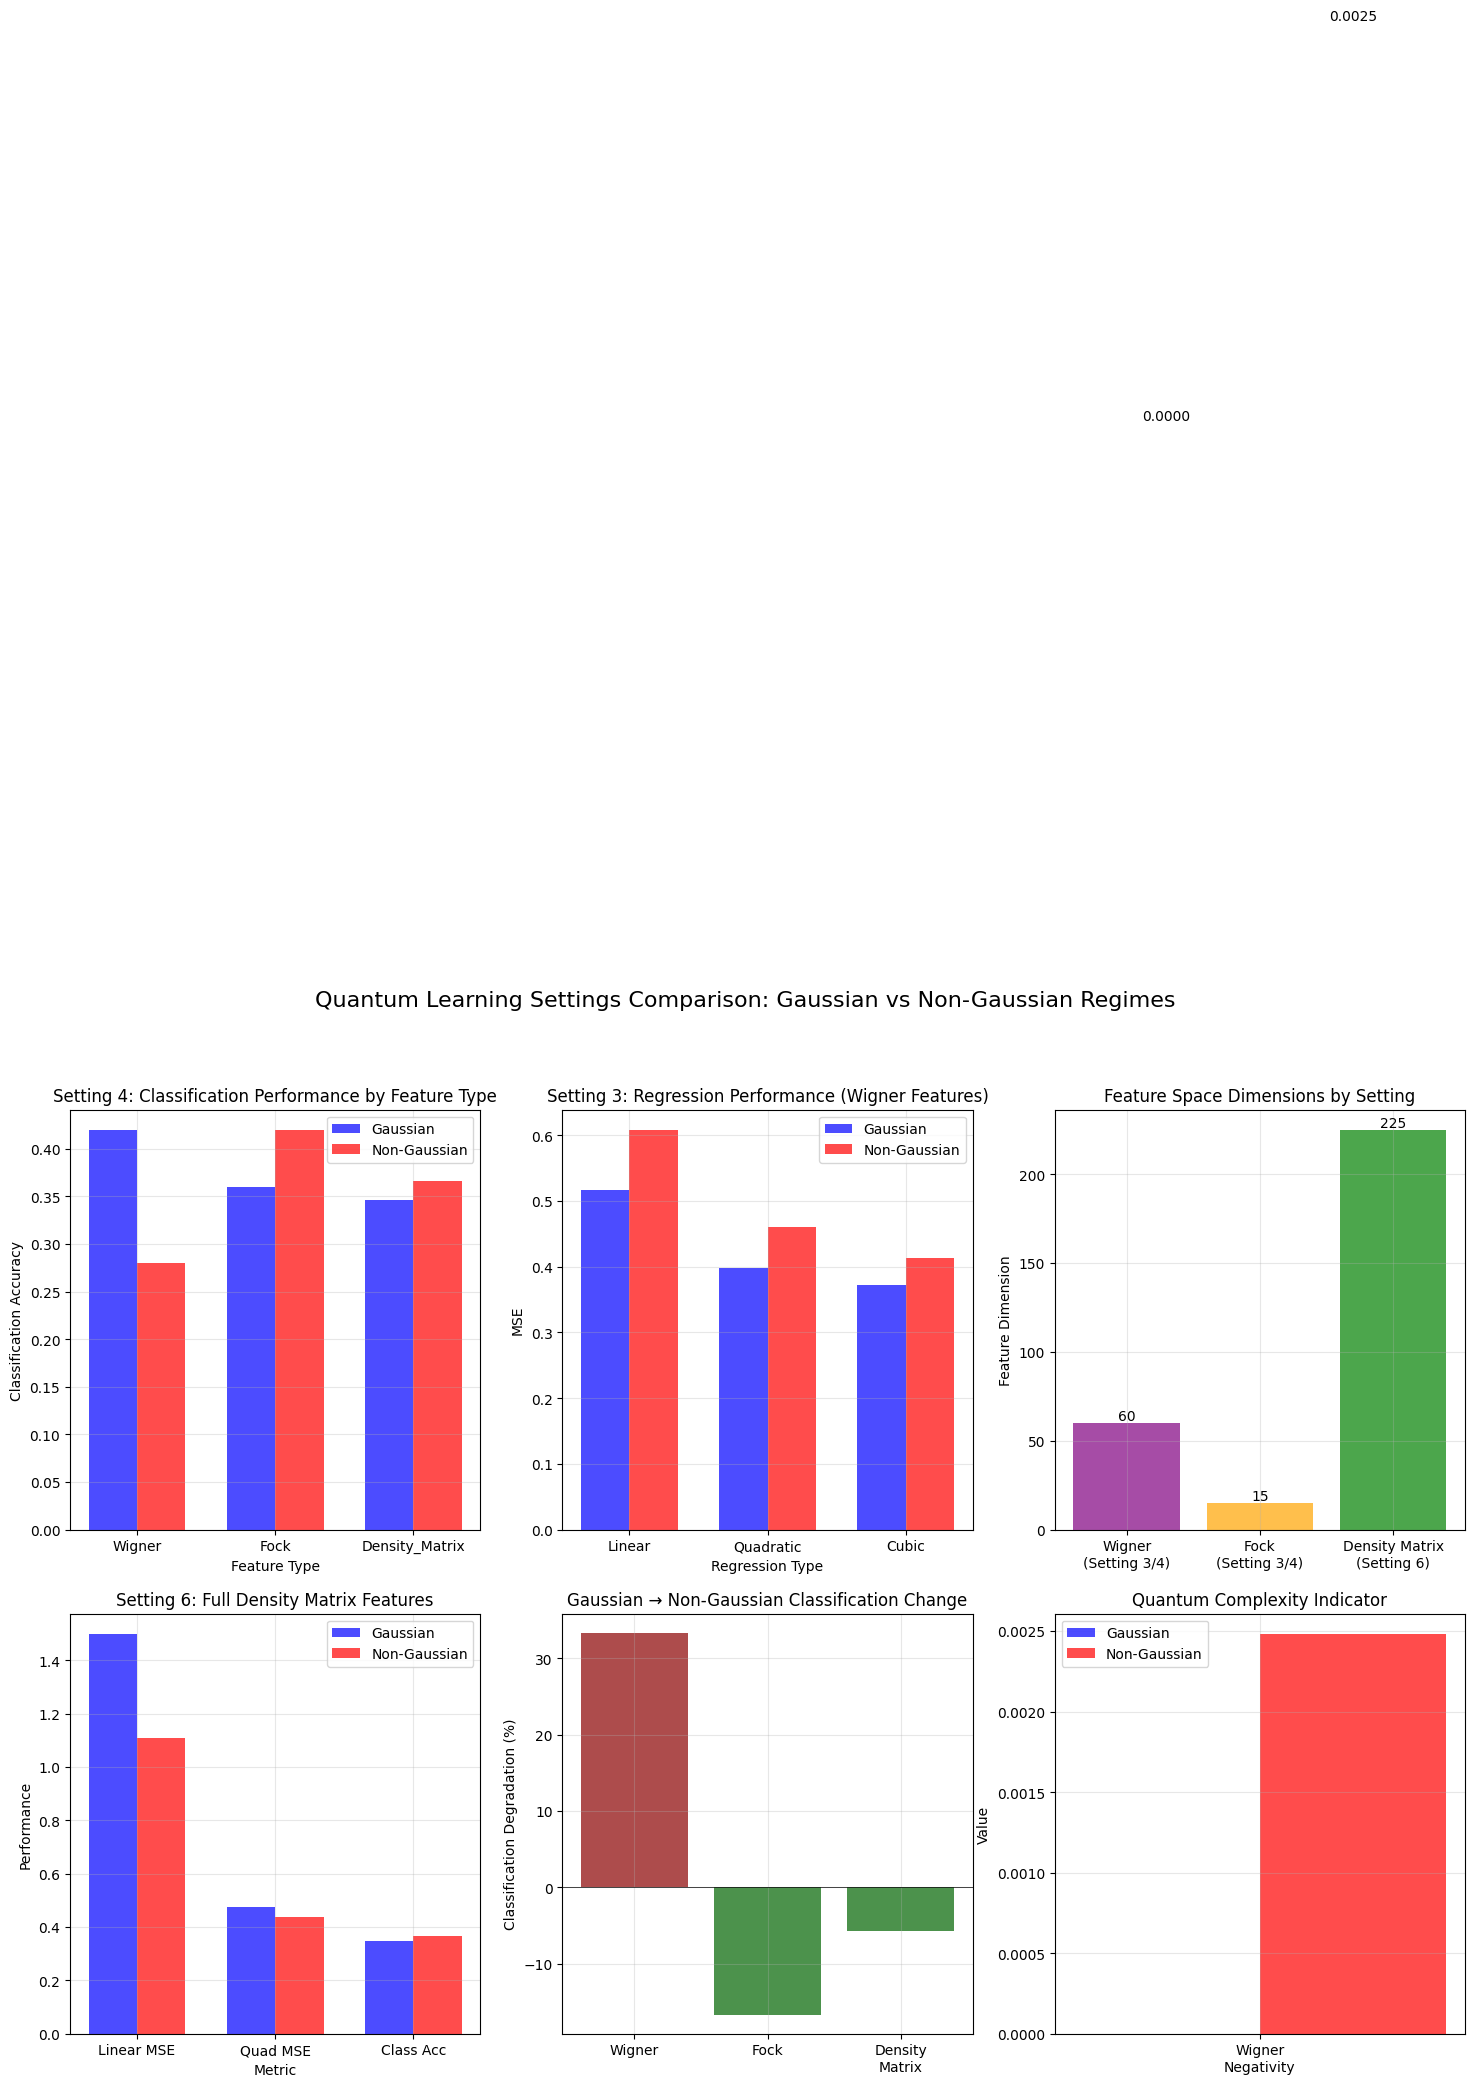

In [ ]:
# @title Execution
if __name__ == "__main__":
    print("=" * 80)
    print("🔬 QUANTUM LEARNING EXPERIMENT: COMPREHENSIVE ANALYSIS")
    print("Comparing ALL Settings 1-6:")
    print("  Setting 1: Learning target state |b⟩ via regression")
    print("  Setting 2: Direct quantum classification with |b_i⟩ states")
    print("  Setting 3: Classical regression on measured probabilities")
    print("  Setting 4: Classical classification on measured probabilities")
    print("  Setting 5: Observable learning (now fully implemented!)")
    print("  Setting 6: Classification using full density matrix elements")
    print("\nKEY QUESTION: How do different quantum measurement strategies")
    print("affect learning performance across Gaussian/Non-Gaussian regimes?")
    print("=" * 80)

    # Photon count regime:
    REGIME = "low_photon"

    if REGIME == "high_photon":
        params = {
            'initial_alpha': 1.0 + 0.5j,   # |α|² ≈ 1.25 mean photons
            'thermal_n_bar': 0.5,
            'dim_hilbert': 50,
            'displacement_strength': 0.3 + 0.2j,
            'kerr_strength_total': 0.6,
            'thermal_noise': 0.1,
            'n_samples': 150,
            'wigner_samples': 60,
            'wigner_max_radius': 2.0,
            'circuit_depth': 10,
            'lambda_mix': 0.8,
            'number_classes': 20
        }

    elif REGIME == "low_photon":
        params = {
            'initial_alpha': 0.3 + 0.2j,   # |α|² ≈ 0.13 mean photons
            'thermal_n_bar': 0.05,
            'dim_hilbert': 15,
            'displacement_strength': 0.1 + 0.05j,
            'kerr_strength_total': 0.3,
            'thermal_noise': 0.02,
            'n_samples': 500,
            'wigner_samples': 100,
            'wigner_max_radius': 0.5,
            'circuit_depth': 5,
            'lambda_mix': 0.8,
            'number_classes': 5
        }

    else:
        params = {
            'initial_alpha': 0.5 + 0.3j,
            'thermal_n_bar': 0.1,
            'dim_hilbert': 20,
            'displacement_strength': 0.15 + 0.1j,
            'kerr_strength_total': 0.4,
            'thermal_noise': 0.05,
            'n_samples': 200,
            'wigner_samples': 80,
            'wigner_max_radius': 1.0,
            'circuit_depth': 10,
            'lambda_mix': 0.85,
            'number_classes': 15
        }

    print(f"\n🔧 RUNNING EXPERIMENT IN {REGIME.upper()} REGIME")
    print(f"Mean photon number: {np.abs(params['initial_alpha'])**2:.3f}")
    print(f"Hilbert space dimension: {params['dim_hilbert']}")
    print(f"Number of samples: {params['n_samples']}")
    print()

    results = run_enhanced_phase_transition_experiment(params)

*Setting 1 — Learning Target State*
* Stable overlaps in both regimes, with slightly better performance in Gaussian: mean ≈ 0.43, Non-Gaussian: mean ≈ 0.39
* Regression to a target state remains robust in low-photon conditions, regardless of non-Gaussian deformation. State overlap remains measurable and learnable.

*Setting 2 — Direct Quantum Classification*
* Accuracy decreases from Gaussian: 0.26 to non-Gaussian: 0.1733
* Mean max overlap in Non-Gaussian increases (0.1906 > 0.1054 in Gaussian)
* Is surprising but plausible. With few classes (5), the class-representative construction is more stable, and class boundaries may even become more structured in the Kerr-deformed space.

*Setting 5 — Observable Learning*
* Non-Gaussian classification improves 0.16 vs. 0.0467 in Gaussian
* Eigenvalue range expands in non-Gaussian regime $[-2.5, 2.5]$
* Non-Gaussian states induce larger spread in expectation values which makes classification via observable measurement more discriminative.
* Learning the observables seems a strong and resilient method, especially when full class-state recovery is hard

*Settings 3 & 4 (Classical ML - Wigner Features)*
* Classification degrades significantly 0.42 to 0.28
* Regression also worsens moderately (linear +17.8%, quadratic +15.9%)
* Wigner features become less expressive under Kerr-induced deformations. Smooth phase-space learning fails when Wigner fringes add subtle structure that's not well-captured by classical models.

*Settings 3 & 4 (Classical ML - Fock Basis Features)*
* Classification improves in the non-Gaussian regime: 0.36 to 0.42
* Fock basis may be a better representation when Kerr evolution is present, as the state develops higher photon-number variance and non-diagonal structure that leaks into the diagonal.

*Setting 6 (Classical ML - Full Density Matrix)*
* All metrics improve slightly in the non-Gaussian regime: Linear regression MSE down 26%, classification accuracy up 5.8%
* The full density matrix contains subtle correlations and retains resilience under moderate non-Gaussianity.


